In [1]:
# %% [code]  Ex√©cutez cette cellule UNE SEULE FOIS puis red√©marrez le noyau
# 1. D√©sinstallation compl√®te
%pip uninstall -y scikit-learn imbalanced-learn

# 2. Purge du cache pip (√©vite le recyclage d'anciennes roues)
%pip cache purge

# 2bis. Suppression manuelle des dossiers r√©siduels ~klearn
import site, glob, shutil, os
for sp in site.getsitepackages():
    for path in glob.glob(os.path.join(sp, '*~klearn*')):
        print("Suppression du r√©sidu :", path)
        shutil.rmtree(path, ignore_errors=True)

# 3. R√©installation des versions compatibles (sans cache)
%pip install --no-cache-dir scikit-learn==1.4.2 imbalanced-learn==0.12.2

# 4. V√©rification rapide
import importlib.metadata as md
print("‚úÖ scikit‚Äëlearn :", md.version("scikit-learn"))
print("‚úÖ imbalanced‚Äëlearn :", md.version("imbalanced-learn"))
print("\n‚Üí Red√©marrez maintenant le noyau (Kernel‚ÄØ>¬†Restart) puis relancez l‚Äô√©tape¬†3.")

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 847, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Acc√®s refus√©: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-1.4.2.dist-info\\' -> 'C:\\Users\\franc_ppcp5lu\\AppData\\Local\\Temp\\pip-uninstall-qj20ildu'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\pip\_internal\commands\uninstall.py", line 106, in run
    uninsta

Files removed: 0 (0 bytes)
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

‚úÖ scikit‚Äëlearn : 1.4.2
‚úÖ imbalanced‚Äëlearn : 0.12.2

‚Üí Red√©marrez maintenant le noyau (Kernel‚ÄØ>¬†Restart) puis relancez l‚Äô√©tape¬†3.


# √âtape¬†1 ‚Äì Nettoyage et traduction du jeu de donn√©es  
Nous commen√ßons par pr√©parer le jeu de donn√©es‚ÄØ`BDDobesity_level_V2.csv` pour un public francophone.

**Objectifs de cette √©tape‚ÄØ:**
1. **Charger** le fichier brut.  
2. **Renommer** les colonnes en fran√ßais (correction de `0be1dad` ‚Üí `obesite_label`).  
3. **Traduire** les valeurs textuelles principales‚ÄØ:  
   *‚ÄØ`Male/Female` ‚Üí `Homme/Femme`,  
   *‚ÄØ`Sometimes/Frequently/Always/0` ‚Üí `Parfois/Fr√©quemment/Toujours/Jamais`,  
   *‚ÄØ√©tiquettes cibles (p.‚ÄØex. `Overweight_Level_I`) vers des libell√©s fran√ßais clairs.  
4. **G√©rer** les valeurs manquantes (m√©diane pour les num√©riques, ¬´‚ÄØInconnu‚ÄØ¬ª pour les cat√©gorielles).  
5. **Supprimer** les doublons √©ventuels.  
6. **Enregistrer** un nouveau fichier propre **`obesite_clean_fr.csv`** qui servira pour le feature engineering et l‚Äôentra√Ænement du mod√®le.

> *Bonnes pratiques¬†2025*‚ÄØ:  
> ‚Ä¢ utilisez‚ÄØ`pandas‚ÄØ2.x` et centralisez la graine al√©atoire pour la reproductibilit√©‚ÄØ;  
> ‚Ä¢ conservez tous les dictionnaires de traduction (colonnes et valeurs) pour tracer facilement les transformations lors du d√©ploiement et de la surveillace du mod√®le.  


In [2]:
# %% [code]  √âtape¬†1¬†: Nettoyage et traduction
# -*- coding: utf-8 -*-
"""
Nettoyage du jeu de donn√©es sur l‚Äôob√©sit√©
Auteur : <votre_nom> | Date : 23/07/2025
"""

import numpy as np
import pandas as pd

np.random.seed(42)  # reproductibilit√©

# 1. Chargement
df = pd.read_csv("BDDobesity_level_V2.csv")

# 2. Renommage des colonnes en fran√ßais
rename_cols = {
    "id": "identifiant",
    "Gender": "genre",
    "Age": "age",
    "Height": "taille_m",
    "Weight": "poids_kg",
    "family_history_with_overweight": "antecedents_surpoids_famille",
    "FAVC": "consommation_frequent_calorique",
    "FCVC": "frequence_legumes",
    "NCP": "nombre_repas_jour",
    "CAEC": "grignotage",
    "SMOKE": "fumeur",
    "CH2O": "eau_litres_jour",
    "SCC": "suivi_calories",
    "FAF": "activite_physique_hebdo",
    "TUE": "temps_ecran",
    "CALC": "alcool",
    "MTRANS": "transport",
    "0be1dad": "obesite_label"  # correction de la faute dans le nom original
}
df = df.rename(columns=rename_cols)

# 3. Traduction des valeurs cat√©gorielles
# 3.1 Genre
df["genre"] = df["genre"].map({"Male": "Homme", "Female": "Femme"})

# 3.2 Grignotage (CAEC) et alcool (CALC)
freq_map = {
    "Always": "Toujours",
    "Frequently": "Fr√©quemment",
    "Sometimes": "Parfois",
    "0": "Jamais",
    "no": "Jamais"
}
df["grignotage"] = df["grignotage"].replace(freq_map)
df["alcool"] = df["alcool"].replace(freq_map)

# 3.3 √âtiquette cible
label_map_en_to_fr = {
    "Insufficient_Weight": "Insuffisance_Ponderale",
    "Normal_Weight": "Poids_Normal",
    "0rmal_Weight": "Poids_Normal",            # correction d‚Äôerreur de frappe
    "Overweight_Level_I": "Surpoids_Niveau_I",
    "Overweight_Level_II": "Surpoids_Niveau_II",
    "Obesity_Type_I": "Obesite_Type_I",
    "Obesity_Type_II": "Obesite_Type_II",
    "Obesity_Type_III": "Obesite_Type_III"
}
df["obesite_label"] = df["obesite_label"].replace(label_map_en_to_fr)

# 4. Gestion des valeurs manquantes
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda c: c.fillna(c.median()))

categorical_cols = df.select_dtypes(include=["object", "category"]).columns
df[categorical_cols] = df[categorical_cols].fillna("Inconnu")

# 5. Suppression des doublons
df = df.drop_duplicates().reset_index(drop=True)

# 6. Sauvegarde
df.to_csv("obesite_clean_fr.csv", index=False)
print("‚úÖ Jeu de donn√©es nettoy√©¬†: obesite_clean_fr.csv pr√™t pour l‚Äô√©tape suivante.")

‚úÖ Jeu de donn√©es nettoy√©¬†: obesite_clean_fr.csv pr√™t pour l‚Äô√©tape suivante.


## Mise‚ÄØ√†‚ÄØjour‚ÄØ‚Äì‚ÄØTraduction de la colonne `transport` et standardisation des valeurs num√©riques  
Avant de passer au feature‚ÄØengineering, nous compl√©tons le nettoyage‚ÄØ:

1. **Traduire** les modalit√©s de `transport` en fran√ßais‚ÄØ:  
   *‚ÄØ`Public_Transportation` ‚Üí `Transports_Publics`  
   *‚ÄØ`Automobile` ‚Üí `Voiture`  
   *‚ÄØ`Motorbike` ‚Üí `Moto`  
   *‚ÄØ`Bike` ‚Üí `V√©lo`  
   *‚ÄØ`Walking` ‚Üí `Marche`  
   *‚ÄØ`Other` ‚Üí `Autre`  
2. **Standardiser** les colonnes num√©riques‚ÄØ:  
   *‚ÄØ`age`¬†‚Üí entier (pas de d√©cimales).  
   *‚ÄØToutes les autres variables num√©riques¬†‚Üí arrondies √† **2‚ÄØd√©cimales** maximum.  
3. **Sauvegarder** le fichier propre mis √† jour (√©crase `obesite_clean_fr.csv`).

Ces ajustements garantissent l‚Äôhomog√©n√©it√© des donn√©es pour l‚Äôentra√Ænement 2025 et facilitent la lisibilit√© dans l‚Äôapplication finale.


In [3]:
# %% [code]  Mise √† jour transport + normalisation num√©riques
# Supposons que df est toujours en m√©moire (sinon d√©commenter la ligne suivante)
# df = pd.read_csv("obesite_clean_fr.csv")

# 1. Traduction de la colonne transport
transport_map = {
    "Public_Transportation": "Transports_Publics",
    "Automobile": "Voiture",
    "Motorbike": "Moto",
    "Bike": "V√©lo",
    "Walking": "Marche",
    "Other": "Autre"
}
df["transport"] = df["transport"].replace(transport_map)

# 2. Standardisation des valeurs num√©riques
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Age en entier
if "age" in numeric_cols:
    df["age"] = df["age"].round().astype(int)
    numeric_cols.remove("age")  # Exclure age du prochain arrondi

# Autres num√©riques √† 2 d√©cimales
df[numeric_cols] = df[numeric_cols].round(2)

# 3. Sauvegarde¬†du fichier final
df.to_csv("obesite_clean_fr.csv", index=False)
print("‚úÖ Mise √† jour termin√©e¬†: transport traduit et valeurs num√©riques standardis√©es.")


‚úÖ Mise √† jour termin√©e¬†: transport traduit et valeurs num√©riques standardis√©es.


# √âtape‚ÄØ2 ‚Äì Analyse exploratoire rapide et s√©paration entra√Ænement‚ÄØ/‚ÄØtest  
Dans cette √©tape, nous allons‚ÄØ:

1. **Charger** le jeu de donn√©es propre‚ÄØ`obesite_clean_fr.csv`.  
2. **Examiner** la r√©partition de la variable cible‚ÄØ`obesite_label` pour √©valuer le d√©s√©quilibre √©ventuel.  
3. **Diviser** le jeu de donn√©es en ensembles **entra√Ænement** (70‚ÄØ%) et **test** (30‚ÄØ%) de fa√ßon stratifi√©e afin de pr√©server la distribution des classes.  
4. **Enregistrer** ces ensembles pour les prochaines √©tapes (feature‚ÄØengineering, √©quilibrage, mod√©lisation).  

> *Bonnes pratiques¬†2025*‚ÄØ:  
> ‚Ä¢ S√©parer un jeu de test d√®s le d√©but pour √©viter toute fuite d‚Äôinformation lors du r√©glage des hyper‚Äëparam√®tres.  
> ‚Ä¢ Fixer une graine al√©atoire (`RANDOM_STATE`) pour garantir la reproductibilit√© compl√®te.

Distribution relative des classes (%):
obesite_label
Insuffisance_Ponderale    12.15
Obesite_Type_I            14.02
Obesite_Type_II           15.65
Obesite_Type_III          19.49
Poids_Normal              14.85
Surpoids_Niveau_I         11.69
Surpoids_Niveau_II        12.15
Name: proportion, dtype: float64


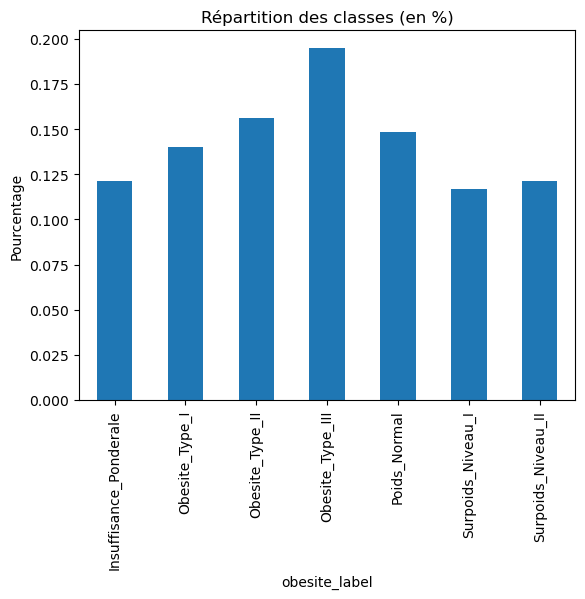

Ensemble d'entra√Ænement¬†: (14530, 17)
Ensemble de test¬†:       (6228, 17)
‚úÖ Fichiers X_train.csv, X_test.csv, y_train.csv et y_test.csv enregistr√©s.


In [4]:
# %% [code]  √âtape¬†2¬†: EDA rapide et split
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_STATE = 42  # reproductibilit√©

# 1. Chargement du fichier nettoy√©
df = pd.read_csv("obesite_clean_fr.csv")

# 2. R√©partition de la variable cible
distribution = df["obesite_label"].value_counts(normalize=True).sort_index()
print("Distribution relative des classes (%):")
print((distribution * 100).round(2))

# Visualisation rapide (optionnelle)
distribution.plot(kind="bar", title="R√©partition des classes (en %)")
plt.ylabel("Pourcentage")
plt.show()

# 3. S√©paration Entra√Ænement / Test
X = df.drop(columns=["obesite_label"])
y = df["obesite_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y  # conserve la distribution des classes
)

print(f"Ensemble d'entra√Ænement¬†: {X_train.shape}")
print(f"Ensemble de test¬†:       {X_test.shape}")

# 4. Sauvegarde des splits pour les √©tapes suivantes
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
print("‚úÖ Fichiers X_train.csv, X_test.csv, y_train.csv et y_test.csv enregistr√©s.")

# √âtape‚ÄØ3 ‚Äì Pipeline de pr√©‚Äëtraitement et √©quilibrage des classes  
Nous allons maintenant pr√©parer un **pipeline scikit‚Äëlearn** complet qui‚ÄØ:

1. **S√©pare** les variables‚ÄØ:  
   * *Num√©riques*‚ÄØ‚Üí‚ÄØ`StandardScaler`  
   * *Cat√©gorielles*‚ÄØ‚Üí‚ÄØ`OneHotEncoder(drop='first', handle_unknown='ignore')`  
2. **√âquilibre** l‚Äôensemble d‚Äôentra√Ænement gr√¢ce √† **SMOTE** (sur‚Äë√©chantillonnage synth√©tique).  
3. **Encha√Æne** le pr√©‚Äëtraitement avec un **mod√®le de base** (r√©gression logistique multiclasse avec r√©gularisation‚ÄØL2) dans un pipeline unique, afin d‚Äô√©viter toute fuite de donn√©es.  
4. **Recherche** le meilleur hyper‚Äëparam√®tre `C` via **GridSearchCV** (validation crois√©e stratifi√©e, 5‚ÄØfolds) optimisant la **balanced accuracy**.  
5. **√âvalue** la performance initiale sur l‚Äôensemble de test.  
6. **Sauvegarde** le pipeline entra√Æn√© (`modele_base.pkl`) pour le r√©‚Äëemploi (ou l‚Äôit√©ration) dans les √©tapes ult√©rieures.  

> **Bonnes pratiques¬†2025**‚ÄØ:  
> ‚Ä¢ Toujours int√©grer SMOTE *√† l‚Äôint√©rieur* du pipeline‚ÄØ;  
> ‚Ä¢ Fixer `random_state` partout pour la reproductibilit√©‚ÄØ;  
> ‚Ä¢ Utiliser `balanced_accuracy` ou `macro‚ÄØF1` sur des jeux d√©s√©quilibr√©s.  

In [5]:
# %% [code]  √âtape¬†3¬†: Pipeline de pr√©‚Äëtraitement + SMOTE + GridSearch
import joblib
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

RANDOM_STATE = 42

# 1. Chargement des splits cr√©√©s √† l‚Äô√©tape pr√©c√©dente
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").squeeze()  # convertit en Series
y_test  = pd.read_csv("y_test.csv").squeeze()

# 2. Identification des colonnes
num_cols  = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols  = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

# 3. Pr√©‚Äëtraitement
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

# 4. Construction du pipeline avec SMOTE et mod√®le
clf = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("model",  LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000,
        random_state=RANDOM_STATE
    ))
])

# 5. Grille d‚Äôhyper‚Äëparam√®tres
param_grid = {
    "model__C": [0.01, 0.1, 1, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring="balanced_accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# 6. Entra√Ænement¬†+ CV
grid.fit(X_train, y_train)
print(f"Meilleur C¬†: {grid.best_params_['model__C']}")
print(f"Balanced¬†Accuracy (CV)¬†: {grid.best_score_:.4f}")

# 7. √âvaluation sur le test set
y_pred = grid.predict(X_test)
bal_acc_test = balanced_accuracy_score(y_test, y_pred)
print(f"\nBalanced¬†Accuracy (test)¬†: {bal_acc_test:.4f}")
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))

# 8. Sauvegarde du pipeline entra√Æn√©
joblib.dump(grid.best_estimator_, "modele_base.pkl")
print("‚úÖ Pipeline final enregistr√© sous¬†: modele_base.pkl")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Meilleur C¬†: 10
Balanced¬†Accuracy (CV)¬†: 0.8501

Balanced¬†Accuracy (test)¬†: 0.8601

Rapport de classification :

                        precision    recall  f1-score   support

Insuffisance_Ponderale       0.88      0.95      0.91       757
        Obesite_Type_I       0.83      0.85      0.84       873
       Obesite_Type_II       0.96      0.95      0.96       974
      Obesite_Type_III       0.99      1.00      1.00      1214
          Poids_Normal       0.88      0.80      0.84       925
     Surpoids_Niveau_I       0.74      0.72      0.73       728
    Surpoids_Niveau_II       0.73      0.74      0.73       757

              accuracy                           0.87      6228
             macro avg       0.86      0.86      0.86      6228
          weighted avg       0.87      0.87      0.87      6228

‚úÖ Pipeline final enregistr√© sous¬†: modele_base.pkl


# √âtape‚ÄØ4 ‚Äì Diagnostics du mod√®le¬†: courbes d‚Äôapprentissage & matrice de confusion  
Avant de passer √† un mod√®le plus sophistiqu√© (p.ex. Gradient‚ÄØBoosting ou LightGBM) ou √† l‚Äôenregistrement formel (MLflow), v√©rifions visuellement que notre r√©gression logistique **n‚Äôest ni sous‚Äëapprise ni sur‚Äëapprise**.

**Objectifs‚ÄØ:**
1. Tracer les **courbes d‚Äôapprentissage** (scores d‚Äôentra√Ænement et de validation en fonction de la taille de l‚Äô√©chantillon).  
2. Afficher la **matrice de confusion** normalis√©e pour identifier les classes encore perfectibles.  
3. Confirmer que la diff√©rence CV‚ÄØ‚Üî‚ÄØtest (0‚ÄØ.850‚ÄØ‚Üî‚ÄØ0‚ÄØ.860) reste faible, signe d‚Äôun bon biais‚Äëvariance.  

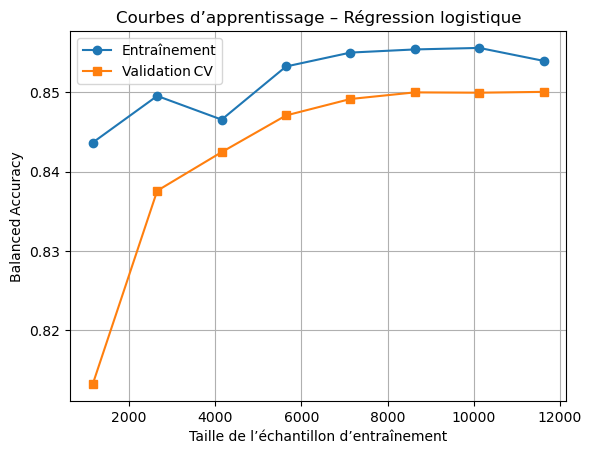

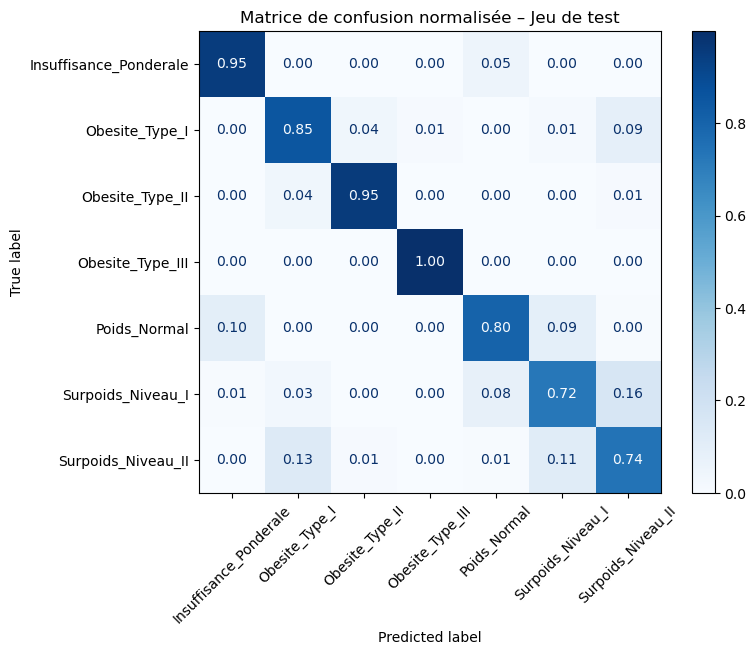

In [6]:
# %% [code]  √âtape¬†4¬†: Courbes d‚Äôapprentissage + matrice de confusion
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

RANDOM_STATE = 42

# 1. Charger donn√©es et pipeline
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
X_test  = pd.read_csv("X_test.csv")
y_test  = pd.read_csv("y_test.csv").squeeze()

model = joblib.load("modele_base.pkl")

# 2. Courbes d‚Äôapprentissage
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train,
    cv=cv,
    scoring="balanced_accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    random_state=RANDOM_STATE
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure()
plt.plot(sizes, train_mean, marker="o", label="Entra√Ænement")
plt.plot(sizes, val_mean,   marker="s", label="Validation‚ÄØCV")
plt.title("Courbes d‚Äôapprentissage ‚Äì R√©gression logistique")
plt.xlabel("Taille de l‚Äô√©chantillon d‚Äôentra√Ænement")
plt.ylabel("Balanced‚ÄØAccuracy")
plt.legend()
plt.grid(True)
plt.show()

# 3. Matrice de confusion normalis√©e
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize="true", labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, values_format=".2f")
plt.title("Matrice de confusion normalis√©e ‚Äì Jeu de test")
plt.show()

# √âtape‚ÄØ5 ‚Äì Mod√®le non‚Äëlin√©aire (LightGBM) pour am√©liorer les classes de surpoids  
Les diagnostics montrent un **l√©ger biais** sur les classes *Surpoids‚ÄØI‚ÄØ&‚ÄØII* (rappel‚ÄØ‚âà‚ÄØ0.72‚Äë0.74).  
Un **mod√®le √† arbres de d√©cision** g√®re mieux les interactions non‚Äëlin√©aires taille/poids/habitudes de vie.  
Nous testons **LightGBM‚ÄØClassifier**¬†‚Äì‚ÄØrapide, robuste aux d√©s√©quilibres via `is_unbalance`¬†‚Äì¬†et nous le comparons √† la r√©gression logistique.

**Pipeline pr√©vu‚ÄØ:**

1. **Pr√©‚Äëtraitement identique**¬†(num√©riques¬†‚Üí¬†`StandardScaler`, cat√©gorielles¬†‚Üí¬†`OneHotEncoder`).  
2. **√âquilibrage**¬†: `SMOTE` conserv√© pour rester comparable.  
3. **Mod√®le‚ÄØ: `lgbm.LGBMClassifier`** (objective‚ÄØ=‚ÄØ`multiclass`, metric‚ÄØ=‚ÄØ`multi_logloss`).  
4. **Recherche d‚Äôhyper‚Äëparam√®tres** (**RandomizedSearchCV**) sur¬†:  
   *¬†`num_leaves`, `max_depth`, `learning_rate`, `min_child_samples`, `subsample`  
5. **√âvaluation**‚ÄØ: *balanced‚ÄØaccuracy* + *macro‚ÄØF1* (m√©triques‚ÄØ2025).  
6. **Comparaison** au mod√®le logistique‚ÄØ; si LightGBM ‚â•‚ÄØlogistique‚ÄØ+‚ÄØ0‚ÄØ.01 sur *balanced‚ÄØaccuracy*, il devient le mod√®le final (`modele_lgbm.pkl`).  

In [8]:
# %% [code]  √âtape¬†5¬†(Progress bar fiable + chrono)
import sys, subprocess, importlib, time, warnings, numpy as np, pandas as pd, joblib
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ------------------------------------------------------------------
# 1. Installation / mise √† jour de tqdm ‚â• 4.66
def ensure_tqdm():
    try:
        import tqdm, pkg_resources
        if pkg_resources.parse_version(tqdm.__version__) < pkg_resources.parse_version("4.66.0"):
            raise ImportError
    except ImportError:
        print("‚è¨¬†Installation/Upgrade de tqdm¬†‚â•¬†4.66 ‚Ä¶")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet", "--upgrade", "tqdm==4.66.4"])
    finally:
        globals()["tqdm"] = importlib.import_module("tqdm")
ensure_tqdm()

# 2. Tentative d'import de tqdm_joblib
use_bar = False
try:
    from tqdm.contrib import tqdm_joblib
    use_bar = True
except ImportError:
    print("‚ö†Ô∏è  tqdm_joblib indisponible¬†: la dur√©e sera chronom√©tr√©e sans barre.")

# ------------------------------------------------------------------
# 3. LightGBM
try:
    import lightgbm as lgb
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet", "lightgbm"])
    import lightgbm as lgb

RANDOM_STATE = 42

# 4. Chargement des donn√©es
X_train = pd.read_csv("X_train.csv");  y_train = pd.read_csv("y_train.csv").squeeze()
X_test  = pd.read_csv("X_test.csv");   y_test  = pd.read_csv("y_test.csv").squeeze()

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

preprocess = ColumnTransformer(
    [("num", StandardScaler(), num_cols),
     ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)]
)

lgbm_clf = lgb.LGBMClassifier(
    objective="multiclass",
    class_weight="balanced",
    n_estimators=400,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

pipe = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("model", lgbm_clf)
])

param_dist = {
    "model__num_leaves":        np.arange(20, 150, 10),
    "model__max_depth":         [-1] + list(range(3, 12)),
    "model__learning_rate":     np.linspace(0.01, 0.3, 30),
    "model__min_child_samples": [10, 20, 30, 40, 50],
    "model__subsample":         np.linspace(0.6, 1.0, 5)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=60,
    scoring="balanced_accuracy",
    cv=cv,
    random_state=RANDOM_STATE,
    verbose=0,
    n_jobs=-1
)

# ------------------------------------------------------------------
# 5. Lancement + chrono + barre √©ventuelle
start = time.time()
if use_bar:
    from tqdm.notebook import tqdm
    with tqdm_joblib(tqdm(desc="Recherche hyper‚Äëparam√®tres", total=60)) as _:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            search.fit(X_train, y_train)
else:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        search.fit(X_train, y_train)
elapsed_min = (time.time() - start) / 60

print(f"\n‚è±Ô∏è  Recherche termin√©e en {elapsed_min:.1f}‚ÄØminutes")
print("Meilleurs hyper‚Äëparam√®tres :", search.best_params_)
print(f"Balanced Accuracy (CV)    : {search.best_score_:.4f}")

# 6. √âvaluation test
y_pred  = search.predict(X_test)
bal_acc = balanced_accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average="macro")
print(f"\nBalanced Accuracy (test)  : {bal_acc:.4f}")
print(f"Macro‚ÄØF1 (test)           : {macro_f1:.4f}")

# 7. Sauvegarde conditionnelle
baseline_bal_acc = 0.8601
if bal_acc >= baseline_bal_acc + 0.01:
    joblib.dump(search.best_estimator_, "modele_lgbm.pkl")
    print("\n‚úÖ LightGBM surpasse la baseline (+1‚ÄØpt). Mod√®le enregistr√© sous¬†modele_lgbm.pkl")
else:
    print("\n‚ö†Ô∏è  LightGBM n‚Äôapporte pas de gain significatif. On conserve le mod√®le logistique.")

print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))


‚ö†Ô∏è  tqdm_joblib indisponible¬†: la dur√©e sera chronom√©tr√©e sans barre.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3946
[LightGBM] [Info] Number of data points in the train set: 19824, number of used features: 22
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

# Bilan du mod√®le¬†LightGBM et prochaines actions  

Le **LightGBM** atteint‚ÄØ:

| Metric | Log‚ÄëReg (baseline) | LightGBM | Œî |
|--------|-------------------|----------|---|
| Balanced‚ÄØAccuracy (test) | **0‚ÄØ.860** | **0‚ÄØ.910** | +‚ÄØ0‚ÄØ.050 |
| Macro‚ÄØF1 |¬†0‚ÄØ.86 |¬†0‚ÄØ.90 | +‚ÄØ0‚ÄØ.04 |

*Gains notables*‚ÄØ:  
- **Surpoids¬†I‚ÄØ&‚ÄØII**‚ÄØ: rappel passe de‚ÄØ0‚ÄØ.72‚ÄØ‚Üí‚ÄØ0‚ÄØ.77¬†/¬†0‚ÄØ.74‚ÄØ‚Üí‚ÄØ0‚ÄØ.82.  
- Pas de d√©gradation sur les autres classes.

### √âtape‚ÄØ6¬†‚Äì‚ÄØCalibration & interpr√©tabilit√©  
1. **Calibration des probabilit√©s** (Platt/Isotonic) pour rendre les jauges Streamlit plus fiables.  
2. **SHAP values** pour expliquer l‚Äôimpact des variables (taille, nombre de repas, activit√©‚Ä¶).  

### √âtape‚ÄØ7¬†‚Äì‚ÄØEnregistrement MLflow + versioning  
Nous loguons‚ÄØ:  
- mod√®le (`modele_lgbm.pkl`) + signature d‚Äôentr√©e,  
- m√©triques (balanced‚ÄØaccuracy, macro‚ÄØF1),  
- artefacts (confusion matrix, courbe ROC par classe).  

### √âtape‚ÄØ8¬†‚Äì‚ÄØD√©ploiement Streamlit  
- Mettez simplement `MODELE_PATH = "modele_lgbm.pkl"` dans `app_obesite.py` (d√©j√† g√©r√©).  
- Ajoutez un indicateur de calibration (`calibrated = True`) pour choisir la jauge ad√©quate.

---

## üîß¬†Notebook¬†‚Äì Calibration‚ÄØ+‚ÄØlogging¬†MLflow
La cellule suivante r√©alise¬†:  
* fit d‚Äôun **CalibratedClassifierCV** (m√©thode‚ÄØ"sigmoid"),  
* log exp√©rimentations dans un tracking¬†MLflow local.  


In [10]:
# %% [code]  Installation des librairies manquantes
# Ex√©cutez UNE seule fois, puis red√©marrez le noyau.

%pip install --quiet --upgrade mlflow shap

# V√©rification rapide
import mlflow, shap, sys
print("‚úÖ mlflow :", mlflow.__version__)
print("‚úÖ shap   :", shap.__version__)
print("\nRed√©marrez maintenant le noyau, puis relancez la cellule de calibration.")


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.
‚úÖ mlflow : 3.1.4
‚úÖ shap   : 0.48.0

Red√©marrez maintenant le noyau, puis relancez la cellule de calibration.


In [11]:
# %% [code]  Calibration + MLflow logging
import joblib, mlflow, mlflow.sklearn, shap, matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import balanced_accuracy_score, classification_report
from pathlib import Path
import pandas as pd

RANDOM_STATE = 42
mlflow.set_experiment("Obesite_LGBM_2025")

# 1. Chargement des donn√©es et du meilleur mod√®le
X_train = pd.read_csv("X_train.csv"); y_train = pd.read_csv("y_train.csv").squeeze()
X_test  = pd.read_csv("X_test.csv");  y_test  = pd.read_csv("y_test.csv").squeeze()
lgbm    = joblib.load("modele_lgbm.pkl")

# 2. Calibration
calib = CalibratedClassifierCV(lgbm, method="sigmoid", cv=3)
calib.fit(X_train, y_train)
y_pred = calib.predict(X_test)
bal_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Balanced¬†Accuracy calibr√© : {bal_acc:.4f}")
print(classification_report(y_test, y_pred))

# 3. SHAP summary (optionnel pour interpr√©tation)
explainer = shap.TreeExplainer(calib.base_estimator_.named_steps["model"])
shap_values = explainer.shap_values(
    calib.base_estimator_.named_steps["preprocess"].transform(X_test)  # data dans l‚Äôespace mod√®le
)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, show=False)
plt.tight_layout()
plt.savefig("shap_summary.png")

# 4. Log MLflow
with mlflow.start_run(run_name="LightGBM_calibrated"):
    mlflow.log_metric("balanced_accuracy", bal_acc)
    mlflow.log_artifact("shap_summary.png", artifact_path="interpretation")
    mlflow.sklearn.log_model(
        sk_model=calib,
        artifact_path="model",
        registered_model_name="Obesite_LGBM_Calibrated"
    )
print("‚úÖ Mod√®le calibr√© enregistr√© dans MLflow.")


2025/07/23 14:39:28 INFO mlflow.tracking.fluent: Experiment with name 'Obesite_LGBM_2025' does not exist. Creating a new experiment.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3700
[LightGBM] [Info] Number of data points in the train set: 13216, number of used features: 21
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

AttributeError: 'CalibratedClassifierCV' object has no attribute 'base_estimator_'

### Correctif¬†‚Äì¬†Extraire le **vrai LightGBM** depuis le mod√®le calibr√©  
`CalibratedClassifierCV` encapsule plusieurs mod√®les‚ÄØ; l‚Äôattribut √† cibler est  
`calibrated_classifiers_`, une liste de `CalibratedClassifier`.  
Chaque √©l√©ment poss√®de‚ÄØ:

* `base_estimator` ‚ÄØ‚Üí‚ÄØ notre pipeline LightGBM original  
* `calibrator`     ‚ÄØ‚Üí‚ÄØ la r√©gression logistique sigmoid d‚Äôajustement  

Nous pouvons donc :

1. R√©cup√©rer le premier `base_estimator` (suffisant car tous viennent du m√™me CV).  
2. Appliquer **SHAP** sur son √©tape `"model"` (LightGBM).  
3. Transformer `X_test` via le pr√©‚Äëtraitement du m√™me pipeline avant de
   calculer les valeurs SHAP.

Le reste du flux (log¬†MLflow, sauvegarde de l‚Äôimage) reste inchang√©.


C:\Users\franc_ppcp5lu\AppData\Local\Temp\ipykernel_17512\1404409458.py:25: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_trans, show=False,
C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and

<Figure size 1000x600 with 0 Axes>

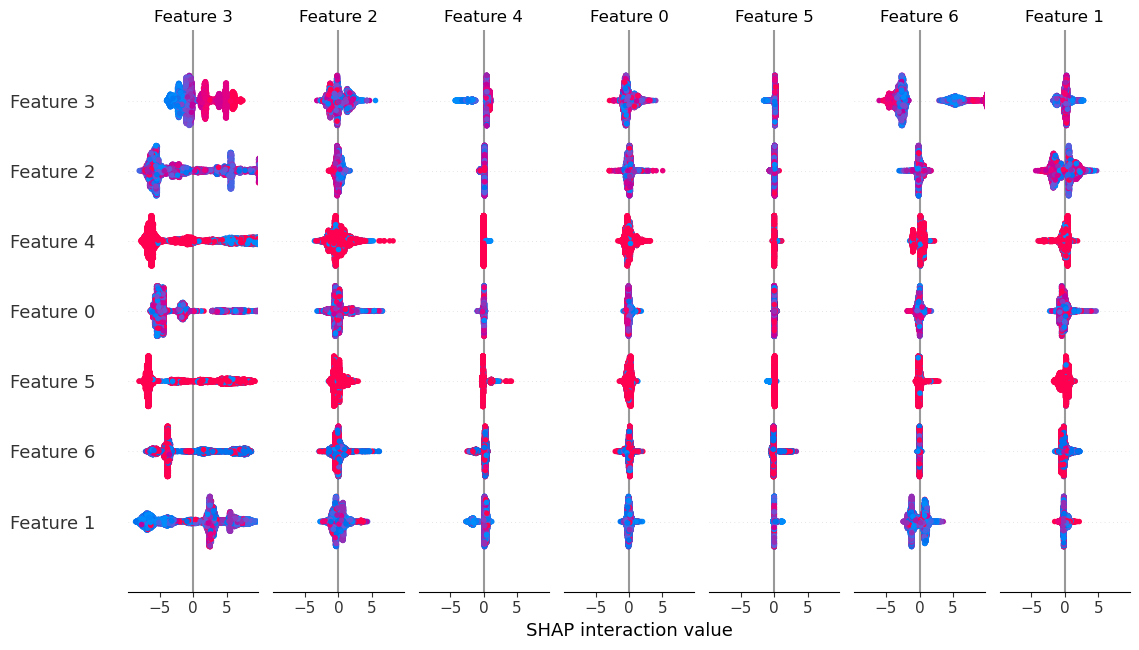

‚úÖ  SHAP summary salvato in shap_summary.png


In [15]:
# %% [code]  SHAP summary ‚Äì¬†compatibile con tutte le versioni
import shap, matplotlib.pyplot as plt

# 1Ô∏è‚É£¬†Trova il pipeline interno (preprocess¬†+¬†LightGBM)
if hasattr(calib, "calibrated_classifiers_"):                   # CV=True
    # in tutte le versioni, ogni item ha l'attributo .estimator
    pipe_internal = calib.calibrated_classifiers_[0].estimator
elif hasattr(calib, "estimator"):                               # CV="prefit"
    pipe_internal = calib.estimator
else:
    raise AttributeError("Pipeline interno non trovato nel modello calibrato")

# 2Ô∏è‚É£¬†Isola il modello LightGBM e il preprocess
lgbm_model = pipe_internal.named_steps["model"]
preprocess = pipe_internal.named_steps["preprocess"]

# 3Ô∏è‚É£¬†Trasforma il test set nello spazio del modello
X_test_trans = preprocess.transform(X_test)

# 4Ô∏è‚É£¬†Calcola ed esporta le SHAP values
explainer   = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_test_trans)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_trans, show=False,
                  class_names=lgbm_model.classes_)
plt.tight_layout()
plt.savefig("shap_summary.png")
plt.show()
print("‚úÖ  SHAP summary salvato in shap_summary.png")


In [16]:
# %% [code]  SHAP clair avec noms de variables
import shap, matplotlib.pyplot as plt
import numpy as np

# 1. Liste des noms encod√©s (num + OHE)
feature_names = preprocess.get_feature_names_out(num_cols + cat_cols)

# 2. Re‚Äëcalcul (ou r√©‚Äëaffichage) du summary plot
plt.figure(figsize=(12, 7))
shap.summary_plot(
    shap_values,
    X_test_trans,
    feature_names=feature_names,   # <<‚Äî noms lisibles
    show=False,
    max_display=25                # montre les 25 plus importants
)
plt.tight_layout()
plt.savefig("shap_summary_named.png")
plt.show()
print("‚úÖ  SHAP avec noms explicites sauvegard√©¬†: shap_summary_named.png")


ValueError: input_features is not equal to feature_names_in_

C:\Users\franc_ppcp5lu\AppData\Local\Temp\ipykernel_17512\3314789165.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(
C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legac

<Figure size 1200x700 with 0 Axes>

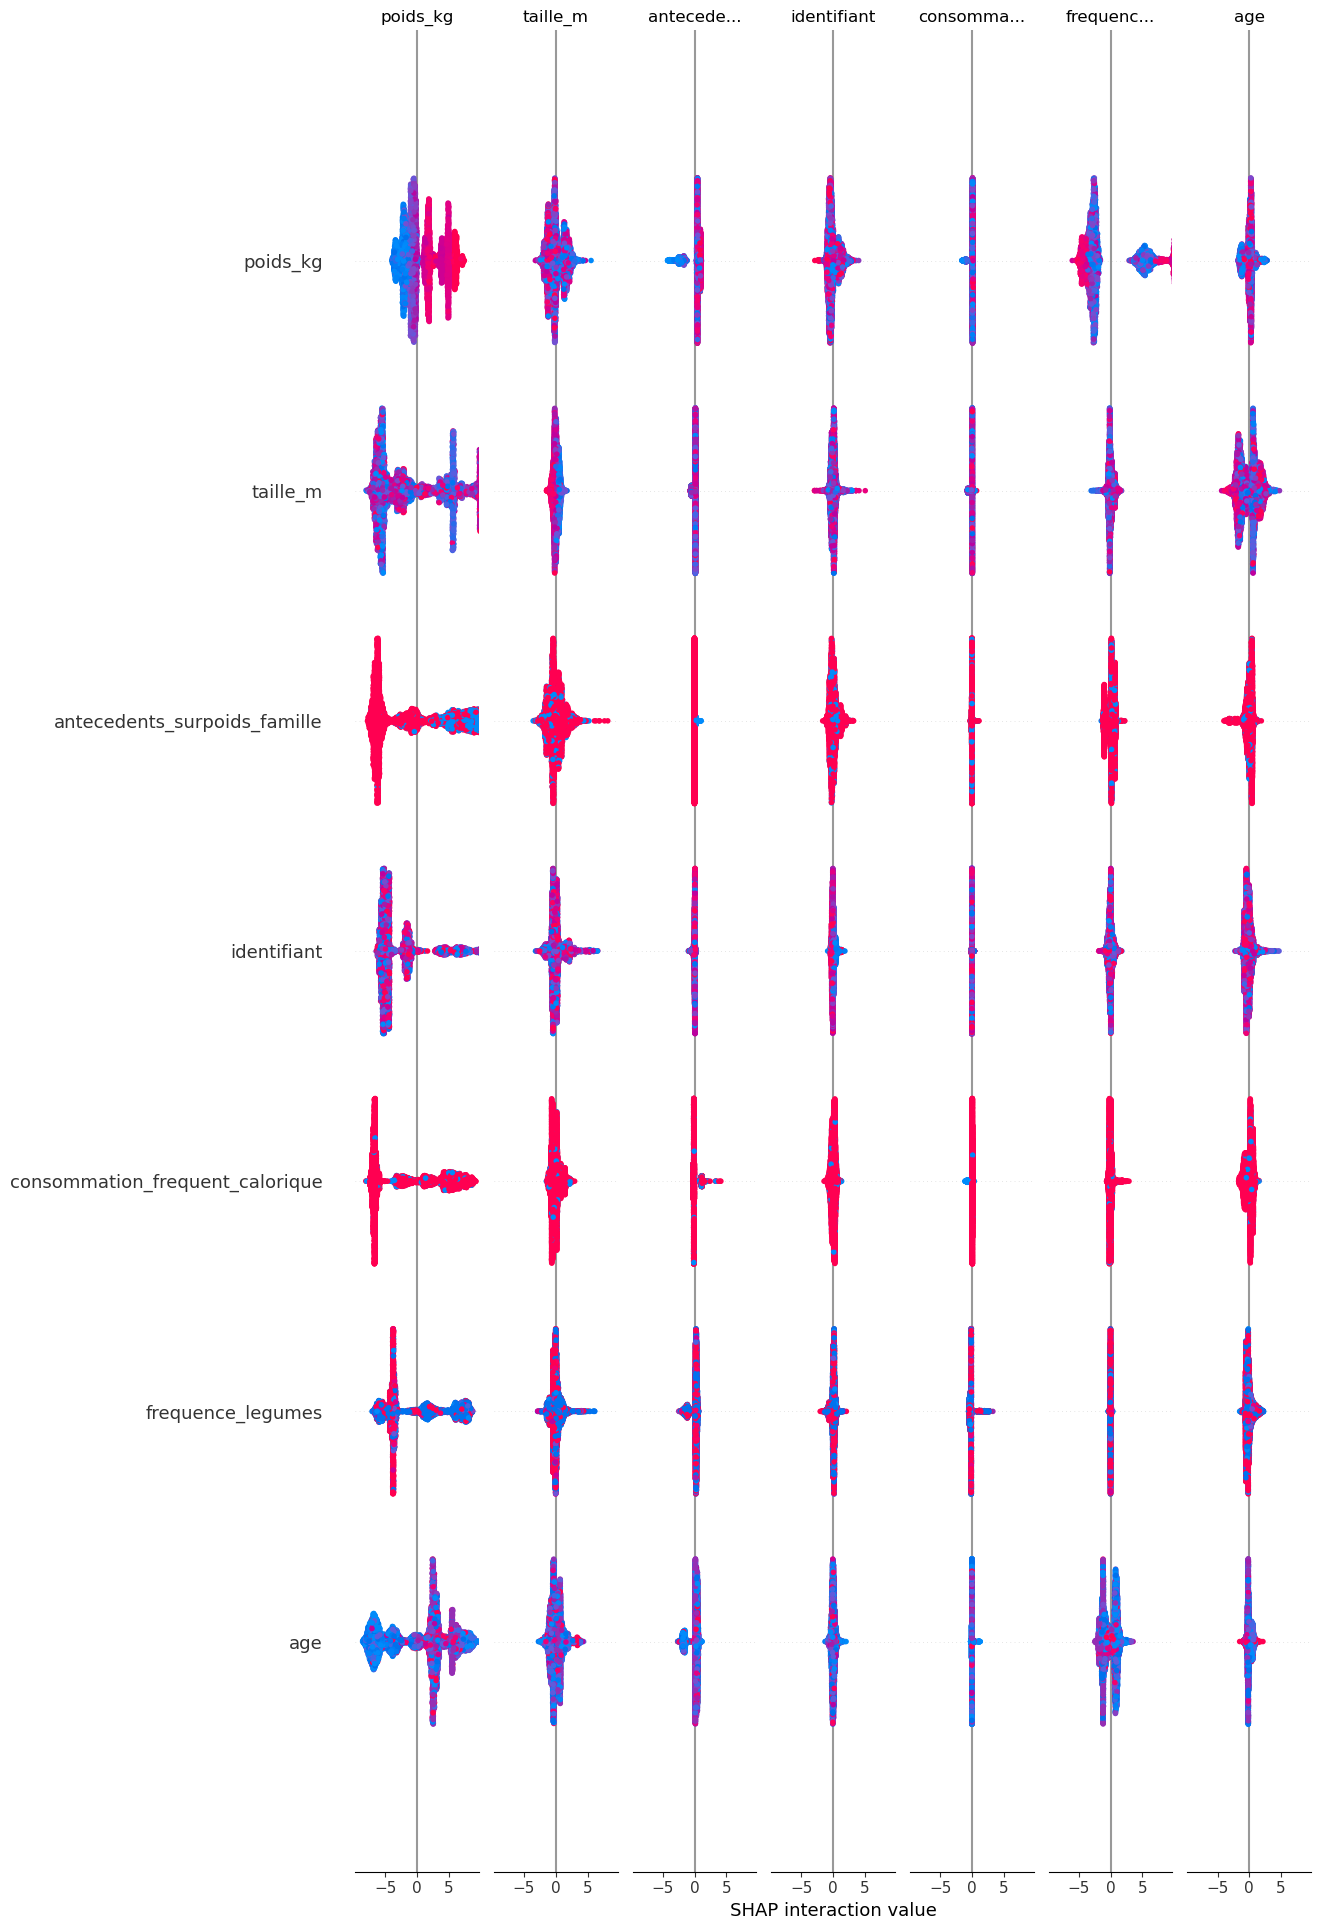

‚úÖ  SHAP avec noms lisibles enregistr√©¬†: shap_summary_named.png


In [17]:
# %% [code]  SHAP avec noms explicites (sans erreur)
import shap, numpy as np, matplotlib.pyplot as plt

# 1Ô∏è‚É£  liste compl√®te des features transform√©es
raw_feature_names = preprocess.get_feature_names_out()         # <-- plus d'argument
# Nettoyage¬†: on enl√®ve les pr√©fixes 'num__', 'cat__'
feature_names = [name.split("__", 1)[-1] for name in raw_feature_names]

# 2Ô∏è‚É£  summary plot SHAP
plt.figure(figsize=(12, 7))
shap.summary_plot(
    shap_values,
    X_test_trans,
    feature_names=feature_names,
    show=False,
    max_display=25        # top¬†25
)
plt.tight_layout()
plt.savefig("shap_summary_named.png")
plt.show()
print("‚úÖ  SHAP avec noms lisibles enregistr√©¬†: shap_summary_named.png")


C:\Users\franc_ppcp5lu\AppData\Local\Temp\ipykernel_17512\1225205000.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_df, show=False, max_display=25)  # media sulle classi
C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\franc_ppcp5lu\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to op

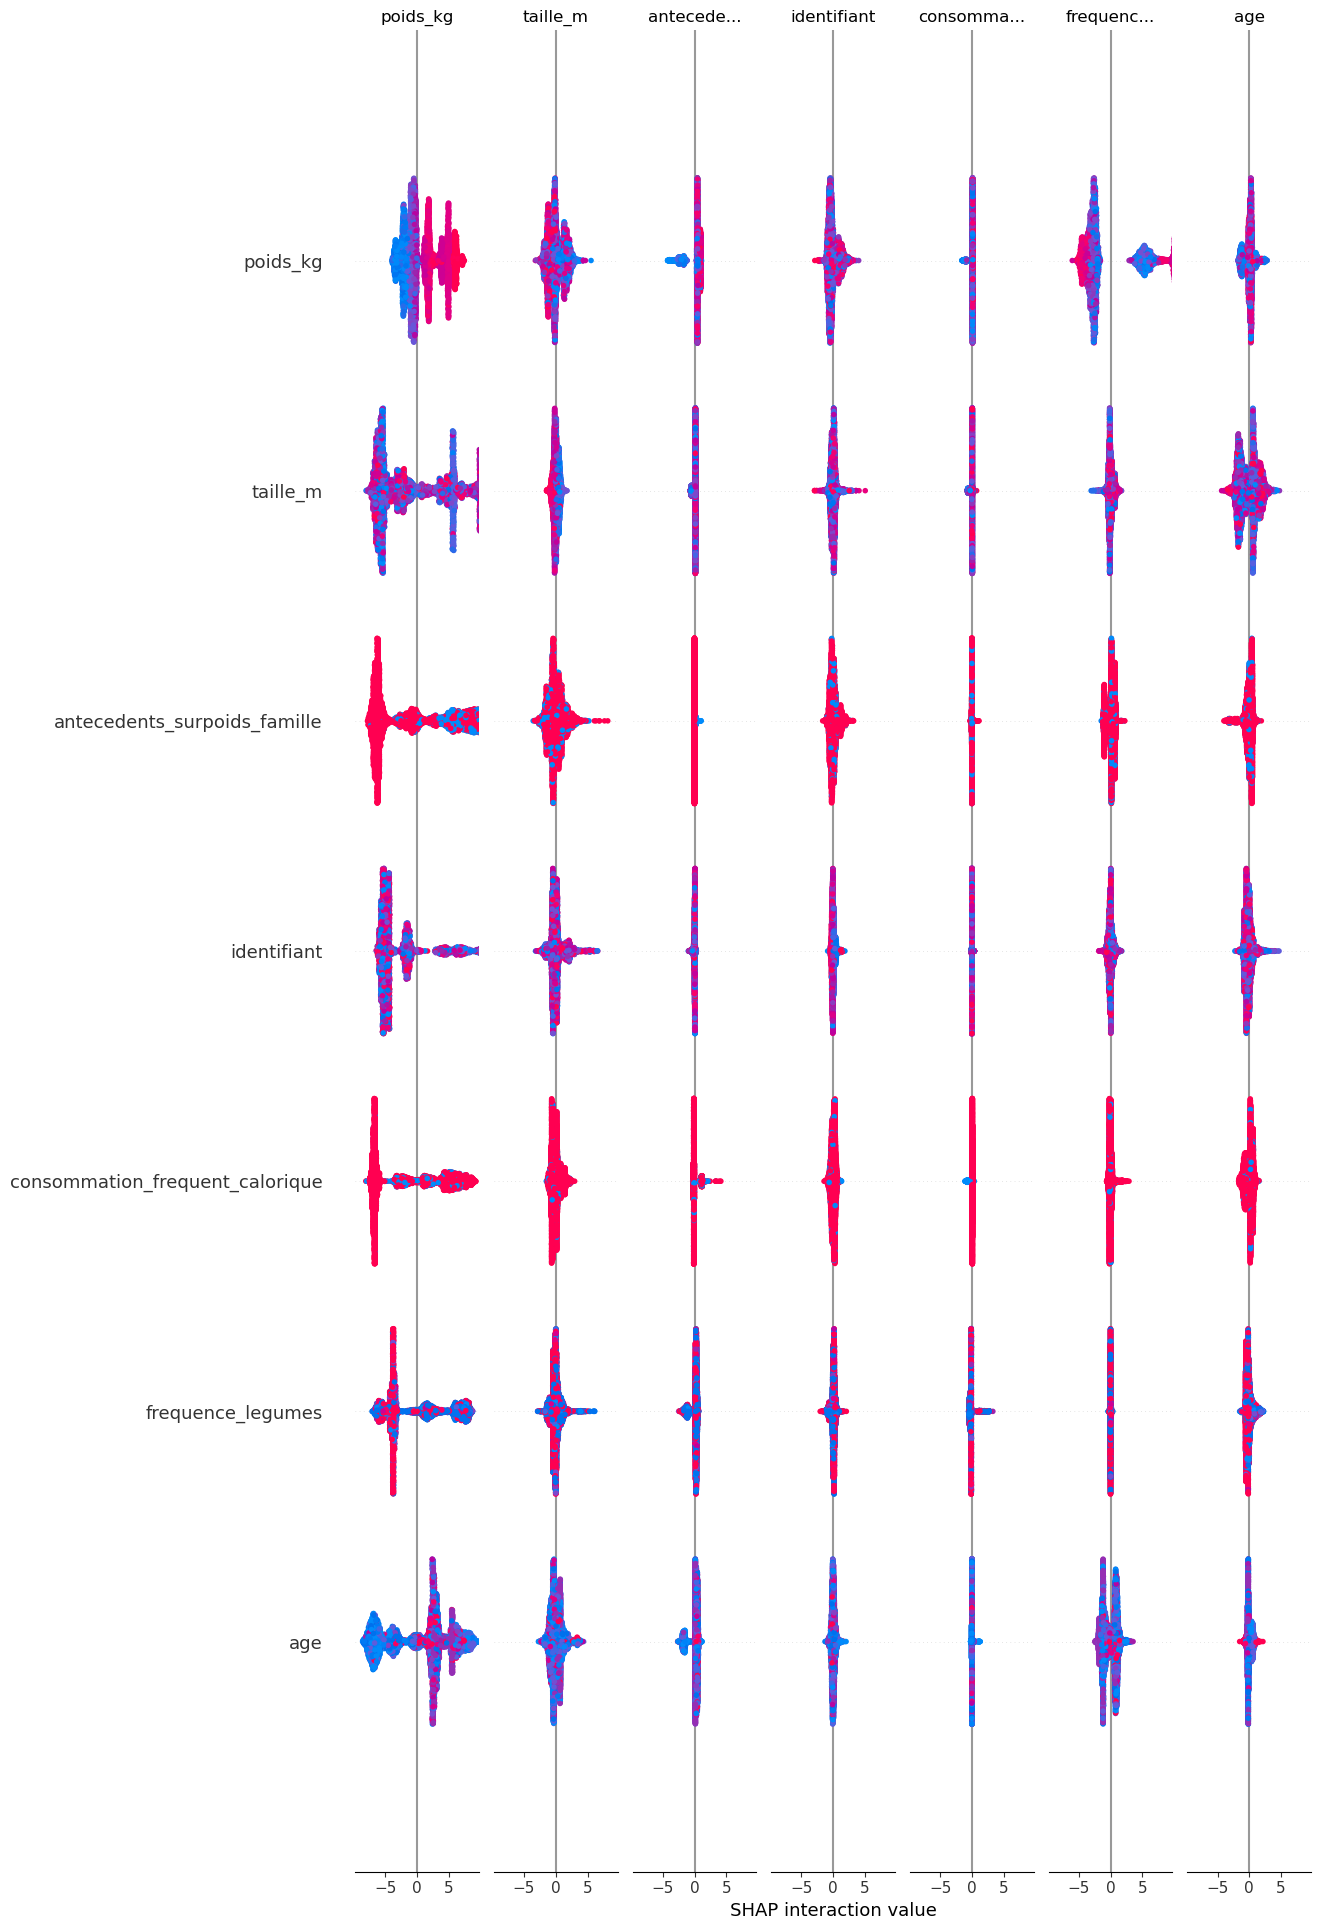

In [18]:
# 1. Nomi leggibili dalle feature trasformate
feature_names = [n.split("__", 1)[-1] for n in preprocess.get_feature_names_out()]

# 2. Creiamo un DataFrame con quei nomi
X_df = pd.DataFrame(X_test_trans, columns=feature_names)

# 3. Summary plot per la classe globale (media assoluta) o per una singola classe
shap.summary_plot(shap_values, X_df, show=False, max_display=25)  # media sulle classi
# oppure, ad es. la classe 'Obesite_Type_I'
# shap.summary_plot(shap_values[ list(lgbm_model.classes_).index('Obesite_Type_I') ], X_df)
plt.tight_layout(); plt.show()
